# 데이터 다루기

## 훈련세트와 테스트세트

### 지도학습과 비지도학습

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [3]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [4]:
print(fish_data[4])

[29.0, 430.0]


In [5]:
# 훈련세트로 입력값 중 0 ~ 34 까지 인덱스까지 사용
train_input = fish_data[:35]

# 훈련세트로 타깃값 중 35 ~ 까지 인덱스까지 사용
train_target = fish_data[35:]

# 테스트세트로 입력값 중 0 ~ 34 까지 인덱스까지 사용
test_input = fish_data[:35]

# 테스트세트로 타깃값 중 35 ~ 까지 인덱스까지 사용
test_target = fish_data[35:]

In [6]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [7]:
print(input_arr.shape)

(49, 2)


In [8]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [9]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [10]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [11]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [12]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

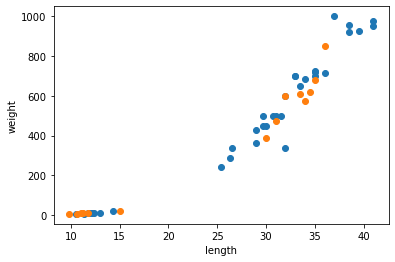

In [13]:
# 잘 섞여있음

import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 두 번째 머신러닝 프로그램

In [14]:
kn = kn.fit(train_input, train_target)

In [15]:
kn.score(test_input, test_target)

1.0

In [16]:
# predict 메서드로 테스트 세트의 예측 결과와 실제 타깃을 확인한다.

kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

#### 데이터 전처리

In [17]:
# 넘파이로 데이터 준비하기

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [18]:
import numpy as np

###### 넘파이의 column_stack() 함수는 전달바은 리스트를 일렬로 세운 다음 차례대로 나란히 연결한다.

In [19]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [20]:
fish_data = np.column_stack((fish_length, fish_weight))

In [21]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [22]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [23]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 사이킷런으로 훈련 세트와 테스트 세트로 나누기

In [24]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [25]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


#### 수상한 도미 한마리

In [26]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [27]:
print(kn.predict([[25, 150]]))

[0.]


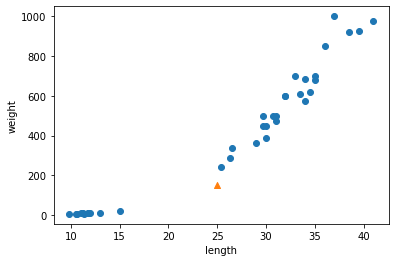

In [28]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
distances, indexes = kn.kneighbors([[25, 150]])

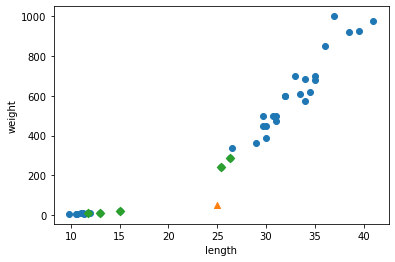

In [31]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 50, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]


In [33]:
print(train_target[indexes])

[[1. 0. 0. 1. 0.]]


In [34]:
print(distances)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


In [35]:
#### 기준을 맞춰라

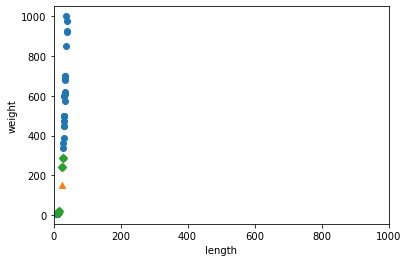

In [36]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')

plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
mean = np.mean(train_input, axis=0) # 평균
std = np.std(train_input, axis=0) # 표준편차

In [39]:
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [40]:
# 표준점수
train_scaled = (train_input - mean) / std

In [41]:
#### 전처리 데이터로 모델 훈련하기

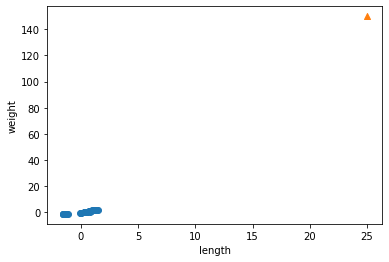

In [42]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

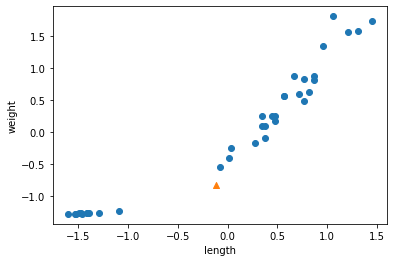

In [43]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [44]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [45]:
# 테스트 세트의 스케일 변환
test_scaled = (test_input - mean) / std

In [46]:
# 모델 평가
kn.score(test_scaled, test_target)

1.0

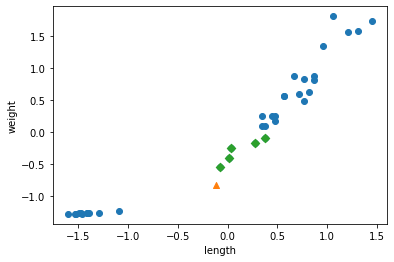

In [47]:
# 마지막으로 Kneighbors함수로 이 샘플의 K-최근접 이웃을 구한 다음 산점도로 그려본다.
# 특성을 표준점수로 바꾸었기 때문에 K-최근접 이웃 알고리즘이 올바르게 거리를 측정했을 것이다.

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()